# Exploratory Data Analysis

In [1]:
import sys
import pandas as pd

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))

Python: 3.8.10 (default, May 19 2021, 13:12:57) [MSC v.1916 64 bit (AMD64)]
Pandas: 1.3.0


# brands distribution after deduplication

,title,url
brand,,
Autos,1487,1487
BrandWorld,200,200
Developer,7200,7200
MIT Technology Review,5991,5991
Mac & i,9387,9387
Make,1789,1789
Security,11216,11216
Telepolis,1635,1635
c't Fotografie,1378,1378


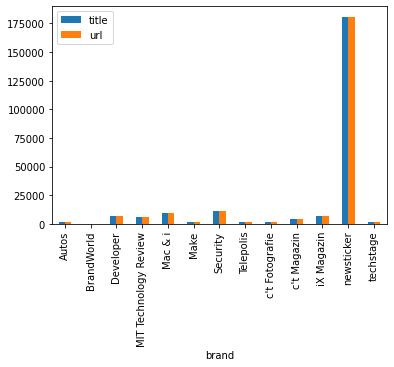

In [2]:
df_urls = pd.read_csv('heise_archiv/urls.csv', index_col = 'Unnamed: 0').drop_duplicates()
df_urls.groupby('brand').count().plot(kind='bar') #brands distribution after deduplication (empty text articles are included)
df_urls.groupby('brand').count()

# EDA on final data set

In [3]:
df_heise_article = pd.read_pickle('heise_archiv/heise_article.pkl') #used dataset

In [4]:
print(df_heise_article.shape)
df_heise_article.info()

(190722, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190722 entries, 0 to 190721
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   text               190722 non-null  object        
 1   author             190722 non-null  object        
 2   description        190720 non-null  object        
 3   date               190722 non-null  object        
 4   title              190722 non-null  object        
 5   url                190722 non-null  object        
 6   brand              190722 non-null  object        
 7   date_preprocessed  190722 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(7)
memory usage: 11.6+ MB


In [5]:
df_heise_article

,text,author,description,date,title,url,brand,date_preprocessed
0,Auf der Konferenz der European Oracle User Gro...,Jo Bager,Auf der Konferenz der European Oracle User Gro...,1996-04-17T00:00:00,Network Computer: Konkurrenz für den PC?,https://www.heise.de/newsticker/meldung/Networ...,newsticker,1996-04-17
1,"Eine, laut Arizona Microchip nicht zu ""knacken...",Harald Ronge,"Eine, laut Arizona Microchip nicht zu ""knacken...",1996-04-18T00:00:00,Sicherheit: Unidirektionales Coding-Verfahren,https://www.heise.de/newsticker/meldung/Sicher...,newsticker,1996-04-18
2,Ein Minus von 740 Millionen Dollar hat Compute...,Frank Möcke,Ein Minus von 740 Millionen Dollar hat Compute...,1996-04-18T00:00:00,Apple: Drastische Maßnahmen nach hohen Verlusten,https://www.heise.de/newsticker/meldung/Apple-...,newsticker,1996-04-18
3,Das Bayerische Landeskriminalamt hat eine Hotl...,Christian Persson,Das Bayerische Landeskriminalamt hat eine Hotl...,1996-04-18T00:00:00,Kinderpornographie: Kripo sucht Hinweise,https://www.heise.de/newsticker/meldung/Kinder...,newsticker,1996-04-18
4,Zum Redaktionsschluß der c't 5/96 wollte Apple...,Stephan Ehrmann,Zum Redaktionsschluß der c't 5/96 wollte Apple...,1996-04-19T00:00:00,Apple: Hohe Preise sollen aus der Krise helfen,https://www.heise.de/newsticker/meldung/Apple-...,newsticker,1996-04-19
...,...,...,...,...,...,...,...,...
190717,Der Elektroautohersteller Tesla weitet seinen ...,Andreas Wilkens,Nun können nicht nur Menschen in Bayern und Ba...,2021-10-18T14:27:00+02:00,Tesla bietet bundesweit Ökostrom an,https://www.heise.de/news/Tesla-bietet-bundesw...,newsticker,2021-10-18
190718,Die Regierung der Metropole Paris hat den Kamp...,Ben Schwan,Eine Kombination aus Mikrofon und Kamera dient...,2021-10-18T09:00:00+02:00,Paris: Neue Sensoren sollen Lärm-Rowdies überf...,https://www.heise.de/hintergrund/Paris-Neue-Se...,MIT Technology Review,2021-10-18
190719,Valve gestattet auf seiner PC-Spieleplattform ...,Daniel Herbig,"Valve möchte auf Steam keine Spiele sehen, die...",2021-10-18T10:05:00+02:00,Steam: Valve will keine NFT-Spiele anbieten,https://www.heise.de/news/Steam-Valve-will-kei...,newsticker,2021-10-18
190720,Am 9. Oktober 2021 wurde die von einer KI verv...,Wolfgang Stieler,"Ahmed Elgammal erklärt im TR-Interview, wie di...",2021-10-18T10:00:00+02:00,Making of: Wie eine KI Beethovens 10. Sinfonie...,https://www.heise.de/hintergrund/Making-of-Wie...,MIT Technology Review,2021-10-18


In [6]:
df_heise_article.groupby('brand').count() #brands distribution after deduplication and removing empty text articles

,text,author,description,date,title,url,date_preprocessed
brand,,,,,,,
MIT Technology Review,5991,5991,5991,5991,5991,5991,5991
c't Magazin,4362,4362,4362,4362,4362,4362,4362
newsticker,180369,180369,180367,180369,180369,180369,180369


# Text data preprocessing

convert umlauts, exclude tokens with one character and those with more than 30 characters (two characters: e.g. tv, pc, ki, it important tokens), consider title+text, count tokens (after excluding one-char-tokens) before stopwords removal

In [8]:
from text_preprocessing import *

In [9]:
df_heise_article_preprocessed = df_heise_article
df_heise_article_preprocessed['originaltext'] = df_heise_article.text
df_heise_article_preprocessed['originaltitle'] = df_heise_article.title

df_heise_article_preprocessed = convert_umlauts(df_heise_article,'text')

In [10]:
data_words = list(sent_to_words(df_heise_article_preprocessed['text'])) #exclude tokens with one character and those with more than 30 characters (two characters: e.g. tv, pc, ki, it important tokens)
df_heise_article_preprocessed['text'] = data_words

In [11]:
print('Gensim: {}'.format(gensim.__version__))

Gensim: 4.0.1


In [12]:
df_heise_article_preprocessed = convert_umlauts(df_heise_article,'title')
data_words_title = list(sent_to_words(df_heise_article_preprocessed['title']))
df_heise_article_preprocessed['title'] = data_words_title

In [13]:
df_heise_article_preprocessed['text'] = df_heise_article_preprocessed.title + df_heise_article_preprocessed.text #text column is now text+title column

In [14]:
df_heise_article_preprocessed = count_tokens(df_heise_article_preprocessed,'text','no_of_tokens_before_stopwords_removal')

In [15]:
df_heise_article_preprocessed = get_space_token(df_heise_article_preprocessed, 'text','space_token')

## Remove short (and long) articles

- descriptive statistics: min 28 Token, max 6216 Token, mean 305 Token, median 254 Token

remove articles which contain less than 100 tokens (5%-percentile)

- remove short articles: no mix of topics can be developed
- remove long articles?: perhaps the articles are longer because the beginning of an innovation is described -> don't remove long articles?

In [16]:
df_heise_article_preprocessed.describe(percentiles = [0.05,0.1,0.15,0.25,0.5,0.75,0.8,0.9,0.95,0.99])

,no_of_tokens_before_stopwords_removal
count,190722.000000
mean,305.395607
std,204.105333
min,28.000000
5%,100.000000
10%,123.000000
15%,140.000000
25%,172.000000
50%,254.000000
75%,377.000000


In [17]:
#remove short articles: no mix of topics can be developed
#remove long articles?: perhaps the articles are longer because the beginning of an innovation is described -> don't remove long articles?

import numpy as np
df_heise_article_preprocessed = df_heise_article_preprocessed[df_heise_article_preprocessed['no_of_tokens_before_stopwords_removal']>= np.percentile(df_heise_article_preprocessed['no_of_tokens_before_stopwords_removal'],5)].reset_index(drop = 'index') #ATTENTION: index is resetted
                                                                                                                                                      
                                                              
#& (df_daten['wortzahl']<= np.percentile(df_daten['wortzahl'],99))]

In [18]:
df_heise_article_preprocessed #5% of the articles are excluded because they contained less than 100 tokens. Therefore, a mix of topics cannot be developed.

,text,author,description,date,title,url,brand,date_preprocessed,originaltext,originaltitle,no_of_tokens_before_stopwords_removal,space_token
0,"[network, computer, konkurrenz, fuer, den, pc,...",Jo Bager,Auf der Konferenz der European Oracle User Gro...,1996-04-17T00:00:00,"[network, computer, konkurrenz, fuer, den, pc]",https://www.heise.de/newsticker/meldung/Networ...,newsticker,1996-04-17,Auf der Konferenz der European Oracle User Gro...,Network Computer: Konkurrenz für den PC?,129,network computer konkurrenz fuer den pc auf de...
1,"[sicherheit, unidirektionales, coding, verfahr...",Harald Ronge,"Eine, laut Arizona Microchip nicht zu ""knacken...",1996-04-18T00:00:00,"[sicherheit, unidirektionales, coding, verfahren]",https://www.heise.de/newsticker/meldung/Sicher...,newsticker,1996-04-18,"Eine, laut Arizona Microchip nicht zu ""knacken...",Sicherheit: Unidirektionales Coding-Verfahren,117,sicherheit unidirektionales coding verfahren e...
2,"[kinderpornographie, kripo, sucht, hinweise, d...",Christian Persson,Das Bayerische Landeskriminalamt hat eine Hotl...,1996-04-18T00:00:00,"[kinderpornographie, kripo, sucht, hinweise]",https://www.heise.de/newsticker/meldung/Kinder...,newsticker,1996-04-18,Das Bayerische Landeskriminalamt hat eine Hotl...,Kinderpornographie: Kripo sucht Hinweise,118,kinderpornographie kripo sucht hinweise das ba...
3,"[apple, hohe, preise, sollen, aus, der, krise,...",Stephan Ehrmann,Zum Redaktionsschluß der c't 5/96 wollte Apple...,1996-04-19T00:00:00,"[apple, hohe, preise, sollen, aus, der, krise,...",https://www.heise.de/newsticker/meldung/Apple-...,newsticker,1996-04-19,Zum Redaktionsschluß der c't 5/96 wollte Apple...,Apple: Hohe Preise sollen aus der Krise helfen,349,apple hohe preise sollen aus der krise helfen ...
4,"[gewinne, microsoft, ibm, und, sun, mit, guten...",Frank Möcke,Von einem großartigen Geschäftsquartal spricht...,1996-04-19T00:00:00,"[gewinne, microsoft, ibm, und, sun, mit, guten...",https://www.heise.de/newsticker/meldung/Gewinn...,newsticker,1996-04-19,"Gewinne: Microsoft, IBM und Sun mit guten Quar...","Gewinne: Microsoft, IBM und Sun mit guten Quar...",218,gewinne microsoft ibm und sun mit guten quarta...
...,...,...,...,...,...,...,...,...,...,...,...,...
181397,"[tesla, bietet, bundesweit, oekostrom, an, der...",Andreas Wilkens,Nun können nicht nur Menschen in Bayern und Ba...,2021-10-18T14:27:00+02:00,"[tesla, bietet, bundesweit, oekostrom, an]",https://www.heise.de/news/Tesla-bietet-bundesw...,newsticker,2021-10-18,Der Elektroautohersteller Tesla weitet seinen ...,Tesla bietet bundesweit Ökostrom an,253,tesla bietet bundesweit oekostrom an der elekt...
181398,"[paris, neue, sensoren, sollen, laerm, rowdies...",Ben Schwan,Eine Kombination aus Mikrofon und Kamera dient...,2021-10-18T09:00:00+02:00,"[paris, neue, sensoren, sollen, laerm, rowdies...",https://www.heise.de/hintergrund/Paris-Neue-Se...,MIT Technology Review,2021-10-18,Die Regierung der Metropole Paris hat den Kamp...,Paris: Neue Sensoren sollen Lärm-Rowdies überf...,363,paris neue sensoren sollen laerm rowdies ueber...
181399,"[steam, valve, will, keine, nft, spiele, anbie...",Daniel Herbig,"Valve möchte auf Steam keine Spiele sehen, die...",2021-10-18T10:05:00+02:00,"[steam, valve, will, keine, nft, spiele, anbie...",https://www.heise.de/news/Steam-Valve-will-kei...,newsticker,2021-10-18,Valve gestattet auf seiner PC-Spieleplattform ...,Steam: Valve will keine NFT-Spiele anbieten,344,steam valve will keine nft spiele anbieten val...
181400,"[making, of, wie, eine, ki, beethovens, sinfon...",Wolfgang Stieler,"Ahmed Elgammal erklärt im TR-Interview, wie di...",2021-10-18T10:00:00+02:00,"[making, of, wie, eine, ki, beethovens, sinfon...",https://www.heise.de/hintergrund/Making-of-Wie...,MIT Technology Review,2021-10-18,Am 9. Oktober 2021 wurde die von einer KI verv...,Making of: Wie eine KI Beethovens 10. Sinfonie...,800,making of wie eine ki beethovens sinfonie voll...


c:\users\albina\anaconda3\envs\dyntobi\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number of tokens_before stopwords removal', ylabel='Density'>

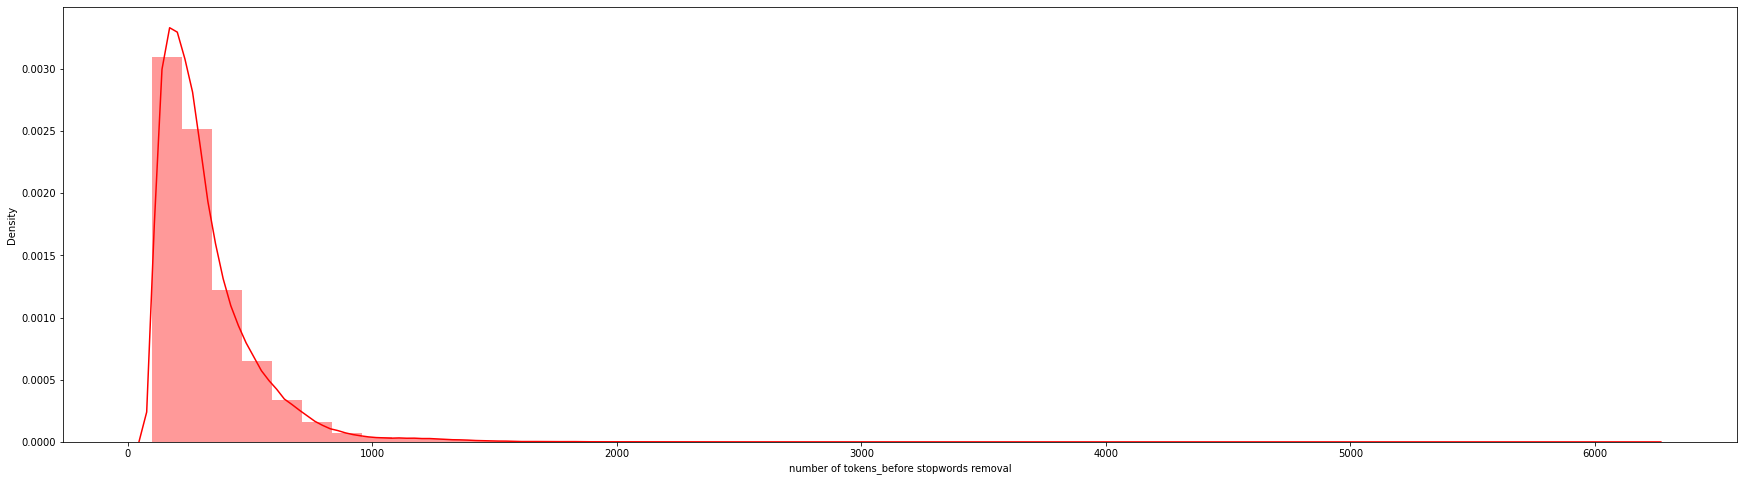

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 8))
sns.distplot([df_heise_article_preprocessed['no_of_tokens_before_stopwords_removal']], color = 'red', axlabel="number of tokens_before stopwords removal")

## Unigram Token statistics

In [27]:
#domainspecific stopwords-list (adjust this if documents with few tokens has been removed)  

In [20]:
df_token_statistics =get_token_statistics(df_heise_article_preprocessed,'text','space_token','../unigram_tokenstatistics.csv')

In [21]:
df_token_statistics

,Vocabulary,Frequency,idf_score
0,die,2006263,1.006182
1,der,1815669,1.005994
2,und,1196161,1.027021
3,in,905481,1.052268
4,von,714337,1.078073
...,...,...,...
836877,ueberbrueckungsaufgabe,1,12.415329
836878,trainingsdatengrosse,1,12.415329
836879,klimaunion,1,12.415329
836880,kompetenzwerte,1,12.415329


In [22]:
df_token_statistics.describe([0.0001,0.0004,0.0005,0.05,0.1,0.15,0.25,0.5,0.75,0.77,0.8,0.9,0.95,0.99])

,Frequency,idf_score
count,8.368820e+05,836882.000000
mean,6.870746e+01,11.774073
std,4.301622e+03,1.167106
min,1.000000e+00,1.005994
0.01%,1.000000e+00,2.456511
0.04%,1.000000e+00,3.691563
0.05%,1.000000e+00,3.869106
5%,1.000000e+00,9.258329
10%,1.000000e+00,10.335888
15%,1.000000e+00,10.911252




Die im scikit-Modul implementierte Formel für die Berechnung des idf-Werts eines 
Wortes lautet5
:
𝑖𝑑𝑓(𝑡) = log [
𝐷
𝑑𝑓(𝑡)
] + 1, (1)
wobei 𝐷 für die Anzahl der Dokumente im Korpus steht. Der Nenner 𝑑𝑓(𝑡) steht für 
die Anzahl der Dokumente, die den Begriff 𝑡 enthalten. Der Gleichung (1) ist zu entnehmen, dass die inverse Dokumenthäufigkeit für einzigartige Worte, die in vielen 
Dokumenten vorkommen, besonders klein ist. Es kann angenommen werden, dass 
Wörter, die in übermäßig vielen Dokumenten vorkommen, nicht spezifisch sind und 
somit in die Stoppwörterliste aufgenommen werden sollten. Die Häufigkeitsverteilung 
der idf-Werte ist im Anhang 2 zu sehen. Dieser Verteilung ist zu entnehmen, dass sehr 
wenige Begriffe in sehr vielen Dokumenten vorkommen, sodass alle Begriffe, dessen 
zugehöriger idf-Wert das 0,04 Prozent-Perzentil der idf-Häufigkeitsverteilung nicht 
5 Diese Information ist auf dieser Webseite des scikit-Moduls entnommen worden: https://scikitlearn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer (letzter Zugriff: 09.01.2020).
7
überschreitet, in die vorläufige Stoppwörterliste aufgenommen wurden. Das 0,04 Prozent-Perzentil entspricht einem idf-Wert von ca. 4,4. Das bedeutet, dass Wörter, die in 
97,6 % aller Dokumente vorkommen als potentielle Stoppwörter in Betracht gekommen sind

c:\users\albina\anaconda3\envs\dyntobi\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\albina\anaconda3\envs\dyntobi\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


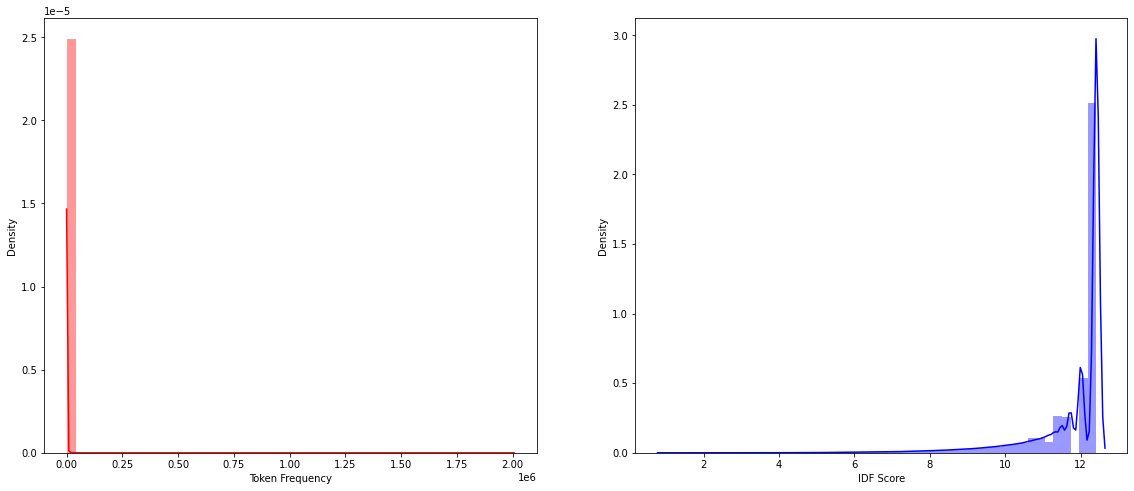

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 8))
plt.subplot(1,3,1)
sns.distplot([df_token_statistics['Frequency']], color = 'red', axlabel="Token Frequency")
plt.subplot(1,3,2)
sns.distplot([df_token_statistics['idf_score']], color = 'blue', axlabel="IDF Score")
plt.show()

## Bigram Token Statistics

In [28]:
#create all possible bigrams
from collections import Counter
import nltk
from nltk.util import ngrams

In [24]:
df_heise_article_preprocessed = ngramconvert(df_heise_article_preprocessed,2,'space_token','bigramtokens')

In [25]:
df_heise_article_preprocessed = get_space_token(df_heise_article_preprocessed, 'bigramtokens','space_bigramtokens')

In [26]:
df_token_statistics_bigram =get_token_statistics(df_heise_article_preprocessed,'bigramtokens','space_bigramtokens','../bigram_tokenstatistics.csv')

In [27]:
df_token_statistics_bigram

,Vocabulary,Frequency,idf_score
0,in_der,141562,1.789840
1,fuer_die,119934,1.884407
2,in_den,106474,1.956937
3,mit_dem,78463,2.162841
4,mit_der,71280,2.223641
...,...,...,...
13035820,unterfuettern_wir,1,12.415329
13035821,unseren_strombedarf,1,12.415329
13035822,strombedarf_decken,1,12.415329
13035823,gebe_konflikte,1,12.415329


In [28]:
df_token_statistics_bigram.describe([0.0001,0.0004,0.0005,0.05,0.1,0.15,0.25,0.5,0.75,0.77,0.8,0.9,0.95,0.99])

,Frequency,idf_score
count,1.303582e+07,1.303582e+07
mean,4.397008e+00,1.214985e+01
std,1.157967e+02,6.226996e-01
min,1.000000e+00,1.789840e+00
0.01%,1.000000e+00,5.463557e+00
0.04%,1.000000e+00,6.508606e+00
0.05%,1.000000e+00,6.683465e+00
5%,1.000000e+00,1.091125e+01
10%,1.000000e+00,1.149904e+01
15%,1.000000e+00,1.172218e+01


c:\users\albina\anaconda3\envs\dyntobi\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\albina\anaconda3\envs\dyntobi\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


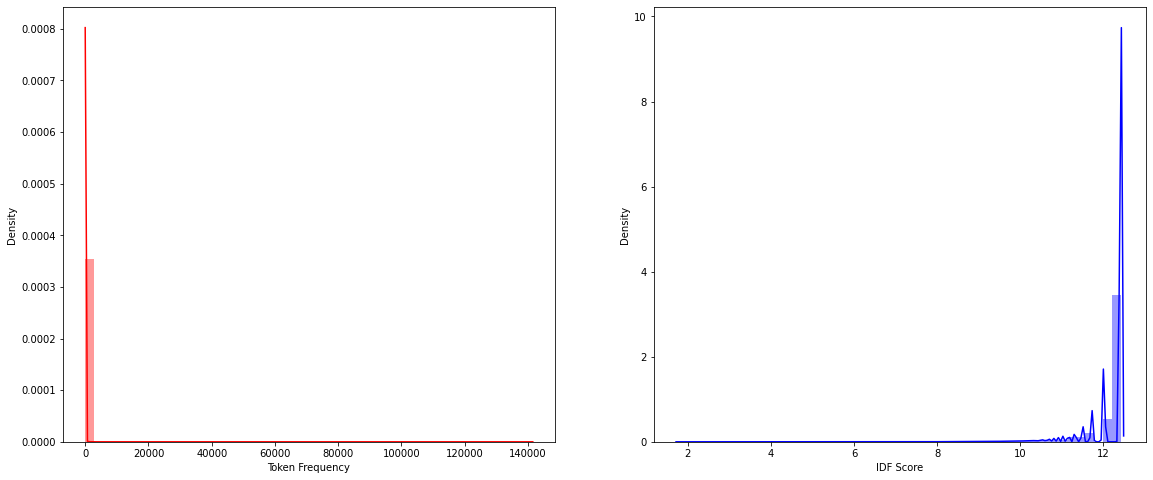

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 8))
plt.subplot(1,3,1)
sns.distplot([df_token_statistics_bigram['Frequency']], color = 'red', axlabel="Token Frequency")
plt.subplot(1,3,2)
sns.distplot([df_token_statistics_bigram['idf_score']], color = 'blue', axlabel="IDF Score")
plt.show()

## Optional: Stemming

In [30]:
df_heise_article_preprocessed = snowballstem_tokens(df_heise_article_preprocessed,'text')

In [31]:
df_heise_article_preprocessed = get_space_token(df_heise_article_preprocessed, 'stemmed_token','space_stemmed_token')

## Stemmed token statistics

In [32]:
df_token_statistics_stemmed =get_token_statistics(df_heise_article_preprocessed,'stemmed_token','space_stemmed_token','../stemmed_unigram_tokenstatistics.csv')

In [33]:
df_token_statistics_stemmed #unigram stemmed

,Vocabulary,Frequency,idf_score
0,die,2006263,1.006182
1,der,1834592,1.005711
2,ein,1327353,1.018471
3,und,1196302,1.026998
4,in,905481,1.052268
...,...,...,...
635759,ueberbrueckungsaufgab,1,12.415329
635760,trainingsdatengross,1,12.415329
635761,klimaunion,1,12.415329
635762,kompetenzwert,1,12.415329


In [34]:
df_token_statistics_stemmed.describe([0.0001,0.0004,0.0005,0.05,0.1,0.15,0.25,0.5,0.75,0.77,0.8,0.9,0.95,0.99])

,Frequency,idf_score
count,6.357640e+05,635764.000000
mean,9.044242e+01,11.791008
std,5.241620e+03,1.177250
min,1.000000e+00,1.005711
0.01%,1.000000e+00,2.096186
0.04%,1.000000e+00,3.339555
0.05%,1.000000e+00,3.514406
5%,1.000000e+00,9.279835
10%,1.000000e+00,10.400426
15%,1.000000e+00,11.029035


In [35]:
df_heise_article_preprocessed = ngramconvert(df_heise_article_preprocessed,2,'space_stemmed_token','bigramstemmedtokens')

In [36]:
df_heise_article_preprocessed = get_space_token(df_heise_article_preprocessed, 'bigramstemmedtokens','space_stemmed_bigramtokens')

In [37]:
df_token_statistics_bigram_stemmed =get_token_statistics(df_heise_article_preprocessed,'bigramstemmedtokens','space_stemmed_bigramtokens','../stemmed_bigram_tokenstatistics.csv')

In [38]:
df_token_statistics_bigram_stemmed #bigramm stemmed

,Vocabulary,Frequency,idf_score
0,in_der,142253,1.786155
1,fuer_die,119934,1.884407
2,in_den,112638,1.919703
3,mit_dem,78463,2.162841
4,in_ein,76751,2.162894
...,...,...,...
10869298,produziert_co,1,12.415329
10869299,zahl_unterfuett,1,12.415329
10869300,unterfuett_wir,1,12.415329
10869301,geb_konflikt,1,12.415329


In [39]:
df_token_statistics_bigram_stemmed.describe([0.0001,0.0004,0.0005,0.05,0.1,0.15,0.25,0.5,0.75,0.77,0.8,0.9,0.95,0.99])

,Frequency,idf_score
count,1.086930e+07,1.086930e+07
mean,5.273441e+00,1.211486e+01
std,1.364616e+02,6.719764e-01
min,1.000000e+00,1.786155e+00
0.01%,1.000000e+00,5.279188e+00
0.04%,1.000000e+00,6.259410e+00
0.05%,1.000000e+00,6.436443e+00
5%,1.000000e+00,1.080589e+01
10%,1.000000e+00,1.149904e+01
15%,1.000000e+00,1.172218e+01


Stemmen verändert Verteilung nicht wirklich

## Generate domain-specific stop words list based on the unigram statistics

In [40]:
#77% of the tokens occur less than 5 times in the corpus -> threshold: remove all tokens that occur 5 times and less in the corpus. According to literature this threshold is very sensitive!
#idf-score: threshold: alles unter 0,05%-Perzentil entfernen? ->df(t) = D/(e^(idf-1)) ->bei 0,05%-Perzentil von idf == 3.8691; Anteil Dokumente = df(t)/D -> iwi macht das Ergebnis keinen Sinn

for i in df_token_statistics.Vocabulary[df_token_statistics['idf_score'] <= 3.8691]:
    print(i)
    
#-> conclusion remove all tokens that occur 5 times ans less; remove all tokens which appear in >75% of documents

die
der
und
in
von
das
den
mit
fuer
auf
zu
im
sich
des
dem
ein
eine
auch
nicht
ist
es
bei
als
an
werden
dass
wie
hat
um
nach
aus
ueber
sie
einer
einen
einem
noch
oder
aber
vor
zum
sind
wird
nur
am
soll
us
zur
prozent
so
haben
sei
mehr
bis
er
man
unter
millionen
euro
koennen
sein
unternehmen
hatte
internet
durch
kann
will
bereits
online
gegen
diese
sollen
damit
nun
wir
neue
dollar
etwa
war
wenn
jahr
habe
microsoft
vom
wurde
beim
deutschland
neuen
keine
schon
rund
dabei
ihre
ab
eines
software
zwei
dann
milliarden
laut
google
sowie
gibt
sagte
allerdings
seien
daten
seit
alle
was
seine
windows
eu
dieser
ohne
werde
ersten
kunden
jahren
version
dazu
wieder
immer
da
doch
ende
usa
selbst
nutzer
zwischen
anderen
lassen
seiner
weiter
worden
ob
muss
diesem
dafuer
drei
wurden
muessen
andere
allem
deutschen
zudem
sondern
geht
hersteller
jetzt
linux
viele
wollen
erst
weitere
anderem
pro
dies
derzeit
jedoch
markt
waren
it
gegenueber
bild
vergangenen
zwar
wuerden
angaben
eigenen
waehrend
machen
server

In [42]:
# ist irgendwie scheinbar kein so plausibler Ansatz? -herkömmliche nltk Stoppwörter verwenden

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


stop_words = stopwords.words('german') #use general nltk-package stopwords

df_stopwords = pd.DataFrame()
df_stopwords['stopwords'] = [stop_words]

df_stopwords = convert_umlauts(df_stopwords,'stopwords') #preprocess stopwords equivalent to text tokens

df_stopwords =snowballstem_tokens(df_stopwords,'stopwords')
df_stopwords.stemmed_token = [set(df_stopwords.stemmed_token[0])]

df_stopwords.to_csv('..\stopwords.csv')
df_stopwords.to_pickle('..\stopwords.pkl')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Albina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
print('Length of stopwordslist: '+ str(len(df_stopwords.stopwords[0]))) #232 stoppwörter
print('Length of stemmed stopwordslist: '+ str(len(df_stopwords.stemmed_token[0])))

Length of stopwordslist: 232
Length of stemmed stopwordslist: 140


In [44]:
df_stopwords

,stopwords,stemmed_token
0,"[aber, alle, allem, allen, aller, alles, als, ...","{bei, ohn, und, sollt, hab, aber, anderr, aus,..."


## Generate bi-grams

In [45]:
for i in df_token_statistics_bigram.Vocabulary[(df_token_statistics_bigram['Frequency']>=5) & (df_token_statistics_bigram['idf_score'] >= 11.5)]: #liste ist ganz plausibel; Ansatz hat in jedem Fall sehr viel Potential
    print(i)

fedora_coreos
us_dollark
kb_mhz
mhz_kb
dollark_mhz
ghzcd_sr
mbytehd_us
mbytehd_mhz
us_xeon
eine_absturzschleife
absturzschleife_geraten
www_discount
black_shark
thorsten_stremlau
view_master
ii_kbyte
ghzintel_core
core_processori
ghzr_mhz
zen_ghz
ja_mbyte
sr_xeon
sebastian_kloess
light_phone
harmony_link
pino_steps
sea_launch
us_phenom
ghzhd_mhz
mhz_wa
us_ryzen
systemd_homed
kaufhaus_oesterreich
av_linux
ghz_ja
ghzhd_us
processori_ghzintel
mx_linux
gold_ghzcd
dji_fpv
ghzcore_ice
meteo_data
kbyte_ghz
nreal_light
airpods_max
anders_rodewyk
solaris_cluster
watt_ddr
beta_pictoris
fps_flicks
flicks_fps
interim_manager
transport_fever
tab_lite
mp_board
emi_tec
bayern_connect
probook_zoll
youtube_space
dash_pro
cve_cve
ghz_ghzcore
graphics_ghzcore
super_follows
glass_tv
speedstep_us
team_konzept
zeno_org
fire_eagle
mbyteddr_wcore
mbytehd_wcore
so_cl
mini_bootloader
us_ghzhd
mbyte_wa
death_metal
fire_rescue
of_medan
sd_express
ucomet_lake
pocketbook_color
stronghold_warlords
office_ltsc
der_ro

In [46]:
#create custom-bigrams
    
custom_bigramlist = list(df_token_statistics_bigram.Vocabulary[(df_token_statistics_bigram['Frequency']>=5) & (df_token_statistics_bigram['idf_score'] >= 11.5)]) #evtl idf-score ein wenig niedriger setzen
custom_bigramlist_stemmed = list(df_token_statistics_bigram_stemmed.Vocabulary[(df_token_statistics_bigram_stemmed['Frequency']>=5) & (df_token_statistics_bigram_stemmed['idf_score'] >= 11.5)]) #evtl. idf-score ein wenig niedriger setzen
 
df_heise_article_preprocessed = create_custombigram(custom_bigramlist,df_heise_article_preprocessed,'text','custom_bigram_token')
df_heise_article_preprocessed = create_custombigram(custom_bigramlist_stemmed,df_heise_article_preprocessed,'stemmed_token','custom_bigram_token_stemmed')


# train bigram Phrases-Module

Bigramme bilden:

https://arxiv.org/pdf/1310.4546.pdf (p. 6)
    
    
help(gensim.models.phrases)

Dokumentation nach welcher Formel die Bigrammbildung funktioniert
Bigram scoring function, based on the original `Mikolov, et. al: "Distributed Representations
        of Words and Phrases and their Compositionality" <https://arxiv.org/abs/1310.4546>`_.
        
        Parameters
        ----------
        worda_count : int
           Number of occurrences for first word.
        wordb_count : int
            Number of occurrences for second word.
        bigram_count : int
            Number of co-occurrences for phrase "worda_wordb".
        len_vocab : int
            Size of vocabulary.
       min_count: int
            Minimum collocation count threshold.
        corpus_word_count : int
            Not used in this particular scoring technique.
        
        Returns
        -------
        float
            Score for given bi-gram, greater than or equal to 0.
        
       Notes
        -----
        Formula: :math:`\frac{(bigram\_count - min\_count) * len\_vocab }{ (worda\_count * wordb\_count)}`.

In [47]:
#another approach from scikit module
# Bigram-Modell bilden
bigram = gensim.models.Phrases(df_heise_article_preprocessed['text'], min_count = 5, threshold=150) #je höher der Schwellenwert umso weniger Bigramme 

bigram_mod = gensim.models.phrases.Phraser(bigram)

In [48]:
#also with stemmed token
bigram_stemmed = gensim.models.Phrases(df_heise_article_preprocessed['stemmed_token'], min_count = 5, threshold=150) #je höher der Schwellenwert umso weniger Bigramme 

bigram_mod_stemmed = gensim.models.phrases.Phraser(bigram_stemmed)

## remove stopwords and make phrases bigrams

In [49]:
data_words_bigrams = make_bigrams(remove_stopwords(df_heise_article_preprocessed['text'], df_stopwords.stopwords[0]),bigram_mod)
data_words_bigrams_stemmed = make_bigrams(remove_stopwords(df_heise_article_preprocessed['stemmed_token'], df_stopwords.stemmed_token[0]),bigram_mod_stemmed)

df_heise_article_preprocessed['phrase_bigram_token'] = data_words_bigrams
df_heise_article_preprocessed['phrase_bigram_stemmed_token'] = data_words_bigrams_stemmed

df_heise_article_preprocessed['custom_bigram_token'] = remove_stopwords(df_heise_article_preprocessed['custom_bigram_token'], df_stopwords.stopwords[0])
df_heise_article_preprocessed['custom_bigram_token_stemmed'] = remove_stopwords(df_heise_article_preprocessed['custom_bigram_token_stemmed'], df_stopwords.stemmed_token[0])

In [50]:
df_heise_article_preprocessed


,text,author,description,date,title,url,brand,date_preprocessed,originaltext,originaltitle,...,bigramtokens,space_bigramtokens,stemmed_token,space_stemmed_token,bigramstemmedtokens,space_stemmed_bigramtokens,custom_bigram_token,custom_bigram_token_stemmed,phrase_bigram_token,phrase_bigram_stemmed_token
0,"[network, computer, konkurrenz, fuer, den, pc,...",Jo Bager,Auf der Konferenz der European Oracle User Gro...,1996-04-17T00:00:00,"[network, computer, konkurrenz, fuer, den, pc]",https://www.heise.de/newsticker/meldung/Networ...,newsticker,1996-04-17,Auf der Konferenz der European Oracle User Gro...,Network Computer: Konkurrenz für den PC?,...,"[network_computer, computer_konkurrenz, konkur...",network_computer computer_konkurrenz konkurren...,"[network, comput, konkurrenz, fuer, den, pc, a...",network comput konkurrenz fuer den pc auf der ...,"[network_comput, comput_konkurrenz, konkurrenz...",network_comput comput_konkurrenz konkurrenz_fu...,"[network, computer, konkurrenz, fuer, pc, konf...","[network, comput, konkurrenz, fuer, pc, konfer...","[network, computer, konkurrenz, fuer, pc, konf...","[network, comput, konkurrenz, fuer, pc, konfer..."
1,"[sicherheit, unidirektionales, coding, verfahr...",Harald Ronge,"Eine, laut Arizona Microchip nicht zu ""knacken...",1996-04-18T00:00:00,"[sicherheit, unidirektionales, coding, verfahren]",https://www.heise.de/newsticker/meldung/Sicher...,newsticker,1996-04-18,"Eine, laut Arizona Microchip nicht zu ""knacken...",Sicherheit: Unidirektionales Coding-Verfahren,...,"[sicherheit_unidirektionales, unidirektionales...",sicherheit_unidirektionales unidirektionales_c...,"[sich, unidirektional, coding, verfahr, ein, l...",sich unidirektional coding verfahr ein laut ar...,"[sich_unidirektional, unidirektional_coding, c...",sich_unidirektional unidirektional_coding codi...,"[sicherheit, coding, verfahren, laut, arizona,...","[unidirektional, coding, verfahr, laut, arizon...","[sicherheit, coding, verfahren, laut, arizona,...","[unidirektional, coding, verfahr, laut, arizon..."
2,"[kinderpornographie, kripo, sucht, hinweise, d...",Christian Persson,Das Bayerische Landeskriminalamt hat eine Hotl...,1996-04-18T00:00:00,"[kinderpornographie, kripo, sucht, hinweise]",https://www.heise.de/newsticker/meldung/Kinder...,newsticker,1996-04-18,Das Bayerische Landeskriminalamt hat eine Hotl...,Kinderpornographie: Kripo sucht Hinweise,...,"[kinderpornographie_kripo, kripo_sucht, sucht_...",kinderpornographie_kripo kripo_sucht sucht_hin...,"[kinderpornographi, kripo, sucht, hinweis, das...",kinderpornographi kripo sucht hinweis das baye...,"[kinderpornographi_kripo, kripo_sucht, sucht_h...",kinderpornographi_kripo kripo_sucht sucht_hinw...,"[kripo, sucht, hinweise, bayerische, hotline, ...","[kripo, sucht, hinweis, bayer, hotlin, fuer, h...","[kripo, sucht, hinweise, bayerische, hotline, ...","[kripo, sucht, hinweis, bayer, hotlin, fuer, h..."
3,"[apple, hohe, preise, sollen, aus, der, krise,...",Stephan Ehrmann,Zum Redaktionsschluß der c't 5/96 wollte Apple...,1996-04-19T00:00:00,"[apple, hohe, preise, sollen, aus, der, krise,...",https://www.heise.de/newsticker/meldung/Apple-...,newsticker,1996-04-19,Zum Redaktionsschluß der c't 5/96 wollte Apple...,Apple: Hohe Preise sollen aus der Krise helfen,...,"[apple_hohe, hohe_preise, preise_sollen, solle...",apple_hohe hohe_preise preise_sollen sollen_au...,"[appl, hoh, preis, soll, aus, der, kris, helf,...",appl hoh preis soll aus der kris helf zum reda...,"[appl_hoh, hoh_preis, preis_soll, soll_aus, au...",appl_hoh hoh_preis preis_soll soll_aus aus_der...,"[apple, hohe, preise, sollen, krise, helfen, a...","[appl, hoh, preis, kris, helf, appl, informati...","[apple, hohe, preise, sollen, krise, helfen, a...","[appl, hoh, preis, kris, helf, appl, informati..."
4,"[gewinne, microsoft, ibm, und, sun, mit, guten...",Frank Möcke,Von einem großartigen Geschäftsquartal spricht...,1996-04-19T00:00:00,"[gewinne, microsoft, ibm, und, sun, mit, guten...",https://www.hei

In [51]:
df_heise_article_preprocessed = get_space_token(df_heise_article_preprocessed, 'phrase_bigram_token','space_phrase_bigram_token')
df_heise_article_preprocessed = get_space_token(df_heise_article_preprocessed, 'phrase_bigram_stemmed_token','space_phrase_bigram_stemmed_token')
df_heise_article_preprocessed = get_space_token(df_heise_article_preprocessed, 'custom_bigram_token','space_custom_bigram_token')
df_heise_article_preprocessed = get_space_token(df_heise_article_preprocessed, 'custom_bigram_token_stemmed','space_custom_bigram_token_stemmed')

In [57]:
df_heise_article_preprocessed.columns


Index(['text', 'author', 'description', 'date', 'title', 'url', 'brand',
       'date_preprocessed', 'originaltext', 'originaltitle',
       'no_of_tokens_before_stopwords_removal', 'space_token', 'bigramtokens',
       'space_bigramtokens', 'stemmed_token', 'space_stemmed_token',
       'bigramstemmedtokens', 'space_stemmed_bigramtokens',
       'custom_bigram_token', 'custom_bigram_token_stemmed',
       'phrase_bigram_token', 'phrase_bigram_stemmed_token',
       'space_phrase_bigram_token', 'space_phrase_bigram_stemmed_token',
       'space_custom_bigram_token', 'space_custom_bigram_token_stemmed'],
      dtype='object')

In [59]:
df_heise_article_preprocessed.drop(columns=['text','date','title','space_token','bigramtokens','space_bigramtokens','stemmed_token','space_stemmed_token','bigramstemmedtokens','space_stemmed_bigramtokens'], inplace = True)# drop unnecessary columns or create new dataframes

In [61]:
df_heise_article_preprocessed.info() #use custom_bigram_token or custom_bigram_token_stemmed to train gensim; use space_custom_bigram_token or space_custom_bigram_token_stemmed to train PVTM or another sklearn Topic Models (phrase is same preprocessing, just another bigram creation)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181402 entries, 0 to 181401
Data columns (total 16 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   author                                 181402 non-null  object        
 1   description                            181400 non-null  object        
 2   url                                    181402 non-null  object        
 3   brand                                  181402 non-null  object        
 4   date_preprocessed                      181402 non-null  datetime64[ns]
 5   originaltext                           181402 non-null  object        
 6   originaltitle                          181402 non-null  object        
 7   no_of_tokens_before_stopwords_removal  181402 non-null  int64         
 8   custom_bigram_token                    181402 non-null  object        
 9   custom_bigram_token_stemmed            181402 no

In [62]:
df_heise_article_preprocessed.groupby('brand').count()

,author,description,url,date_preprocessed,originaltext,originaltitle,no_of_tokens_before_stopwords_removal,custom_bigram_token,custom_bigram_token_stemmed,phrase_bigram_token,phrase_bigram_stemmed_token,space_phrase_bigram_token,space_phrase_bigram_stemmed_token,space_custom_bigram_token,space_custom_bigram_token_stemmed
brand,,,,,,,,,,,,,,,
MIT Technology Review,5979,5979,5979,5979,5979,5979,5979,5979,5979,5979,5979,5979,5979,5979,5979
c't Magazin,4263,4263,4263,4263,4263,4263,4263,4263,4263,4263,4263,4263,4263,4263,4263
newsticker,171160,171158,171160,171160,171160,171160,171160,171160,171160,171160,171160,171160,171160,171160,171160


In [65]:
df_heise_article_preprocessed.describe()

,no_of_tokens_before_stopwords_removal
count,181402.000000
mean,316.975739
std,202.592274
min,100.000000
25%,184.000000
50%,263.000000
75%,386.000000
max,6216.000000


In [70]:
import os
os.makedirs('data/') # create folder
df_heise_article_preprocessed.to_csv('data/data_heise_preprocessed.csv',encoding='utf-8-sig')
df_heise_article_preprocessed.to_pickle('data/data_heise_preprocessed.pkl')